# Regression Case Study

**PROBLEM STATEMENT** 
There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') # To supress warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

**Read the data**

In [2]:
cars=pd.read_csv('Cars.csv')

**Check the Head**

In [3]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.00000,99000.00000,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.00000,5.00000,NaN,6.00000
1,Maruti Baleno,Kochi,2018.00000,18678.00000,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.00000,4.00000,NaN,8.32000
2,Mahindra Xylo,Bangalore,2013.00000,197000.00000,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.00000,5.00000,NaN,4.00000
3,Hyundai Grand,Delhi,2014.00000,45000.00000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.00000,4.00000,NaN,3.49000
4,Toyota Innova,Delhi,2011.00000,65000.00000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.00000,5.00000,NaN,6.40000


In [4]:
from pandas_profiling import ProfileReport
report = ProfileReport(cars)
report.to_file("Report.html")

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
cars.shape

(5961, 15)

In [5]:
#cars =cars[(cars['Year'] >= 2000) & ()] - remove older data if resale of vehicles of tht year not allowed anymore

**Get the info**

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


**Get the Summary Statistics**

In [8]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5959.00000,2013.38916,3.24305,1998.00000,2011.50000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,5953.00000,58711.10012,91712.20717,171.00000,33931.00000,53000.00000,73000.00000,6500000.00000
Seats,5956.00000,5.26914,0.78905,2.00000,5.00000,5.00000,5.00000,10.00000
No. of Doors,5960.00000,4.11493,0.34476,2.00000,4.00000,4.00000,4.00000,5.00000
Price,5961.00000,9.52810,11.21438,0.44000,3.50000,5.66000,10.00000,160.00000


In [9]:
cars.describe(include='object').T

,count,unique,top,freq
Name,5961,212,Maruti Swift,343
Location,5950,11,Mumbai,781
Fuel_Type,5961,5,Diesel,3188
Transmission,5934,2,Manual,4225
Owner_Type,5946,4,First,4875
Mileage,5959,439,18.9 kmpl,172
Engine,5944,143,1197 CC,606
Power,5929,369,74 bhp,233
Colour,5950,3,White,2115
New_Price,824,540,4.78 Lakh,6


**Check for Null Values**

In [10]:
cars.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

**% Null values**

In [ ]:
cars.isnull().sum()/cars.isnull().sum().sum()*100

**Since New_Price has over 97% Null values, we would drop this column for now**

In [11]:
cars.drop('New_Price',axis=1, inplace=True)

In [14]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.00000,99000.00000,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.00000,5.00000,6.00000
1,Maruti Baleno,Kochi,2018.00000,18678.00000,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.00000,4.00000,8.32000
2,Mahindra Xylo,Bangalore,2013.00000,197000.00000,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.00000,5.00000,4.00000
3,Hyundai Grand,Delhi,2014.00000,45000.00000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.00000,4.00000,3.49000
4,Toyota Innova,Delhi,2011.00000,65000.00000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.00000,5.00000,6.40000


**Check for Duplicates**

In [12]:
cars.duplicated().sum()

# 3%

2

In [13]:
cars.drop_duplicates(inplace=True)

**Check for Object Data Type**

In [ ]:
cars.select_dtypes(include='object').head()

- It seems that the columns Mileage, Engine , Power needs to be cleaned and converted to Float/int dtype

In [15]:
cars['Mileage'] = cars['Mileage'].str.replace(',','').str.replace('kmpl','').str.replace('km/kg','').astype('float')

In [16]:
cars['Engine'] = cars['Engine'].str.replace(',','').str.replace('CC','').astype('float')

In [17]:
cars['Power'] = cars['Power'].replace('null bhp', 0)
cars['Power'] = cars['Power'].str.replace(',','').str.replace('bhp','').astype('float')

In [18]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,White
4,Toyota Innova,Delhi,Diesel,Manual,First,Others


**Create a new column 'Brand' which has the brand name of the Cars**

In [19]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [20]:
cars.Brand.value_counts()

Maruti           1187
Hyundai          1100
Honda             601
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Smart               1
Lamborghini         1
Bentley             1
Name: Brand, dtype: int64

- Brand Isuzu is available twice in different cases ('ISUZU', 'Isuzu'). To avoid this being considered as 2 different brands, correct to single format

In [21]:
cars['Brand'] = cars['Brand'].str.replace('ISUZU', 'Isuzu')

**Create a new column 'Model' which has the Model name of the Cars**

In [22]:
cars['Model']=cars.Name.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [23]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

1                     3
1000                  1
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               106
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia           

- Model Ecosport is available twice in different cases ('Ecosport', 'EcoSport'). To avoid this being considered as 2 different models, correct to single format.

In [ ]:
cars['Model'] = cars['Model'].str.replace('EcoSport', 'Ecosport')

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(y=(cars.Brand),palette='PuRd_r');

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(y=cars.Model.value_counts()[cars.Model.value_counts()>90].index,
            x=cars.Model.value_counts()[cars.Model.value_counts()>90].values,palette='PuRd_r');

- There is a car by the Model name 'New', let's check which car is it
- There is a car by the Model name '3', let's check which car is it


In [25]:
cars[cars['Model']=='New'].head(2) # so it is a Mercedes Benz

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
71,Mercedes-Benz New,Hyderabad,2012.00000,86000.00000,Diesel,Automatic,First,14.84000,2143.00000,170.00000,White,5.00000,4.00000,19.00000,Mercedes-Benz,New
279,Mercedes-Benz New,Jaipur,2009.00000,116000.00000,Diesel,Manual,Second,15.80000,2148.00000,170.00000,White,5.00000,4.00000,8.50000,Mercedes-Benz,New


In [24]:
cars[cars['Model']=='3'].head(2) # so it is a BMW

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
22,BMW 3,Mumbai,2014.00000,48000.00000,Diesel,Automatic,First,21.76000,1995.00000,190.00000,Others,5.00000,4.00000,26.50000,BMW,3
35,BMW 3,Chennai,2009.00000,137000.00000,Diesel,Automatic,Second,13.20000,1995.00000,170.00000,Others,5.00000,4.00000,9.00000,BMW,3


**Bin the cars as per average Price of the Brand**
- 'Budget_Friendly'
- 'Medium_Range'
- 'TopNotch_Cars'

In [ ]:
cars.Price.describe()

In [26]:
#Binning the Car Companies based on avg prices of each car Company.
cars['Price'] = cars['Price'].astype('int')
cars_2 = cars.copy()
t = cars_2.groupby(['Brand'])['Price'].mean()
t

Brand
Audi             25.13136
BMW              24.82397
Bentley          59.00000
Chevrolet         2.45133
Datsun            2.53846
Fiat              2.80000
Force             9.33333
Ford              6.42953
Honda             4.93511
Hyundai           4.86182
Isuzu            14.66667
Jaguar           37.30000
Jeep             18.33333
Lamborghini     120.00000
Land             39.45614
Mahindra          7.61029
Maruti            4.05897
Mercedes-Benz    26.43396
Mini             26.53846
Mitsubishi       10.62963
Nissan            4.27473
Porsche          48.05556
Renault           5.30769
Skoda             7.07514
Smart             3.00000
Tata              3.06522
Toyota           11.13171
Volkswagen        4.79048
Volvo            18.52381
Name: Price, dtype: float64

In [33]:
t.reset_index()

,Brand,Price
0,Audi,25.13136
1,BMW,24.82397
2,Bentley,59.00000
3,Chevrolet,2.45133
4,Datsun,2.53846
5,Fiat,2.80000
6,Force,9.33333
7,Ford,6.42953
8,Honda,4.93511
9,Hyundai,4.86182


<AxesSubplot:xlabel='Price'>

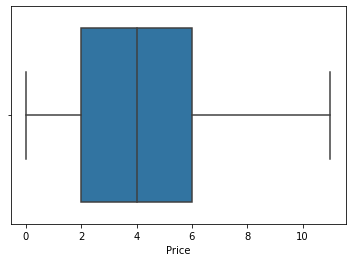

In [27]:
sns.boxplot(cars[cars['Brand'] == 'Maruti'].Price)

In [34]:
cars_2

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price_x,Brand,Model,Price_y
0,Mahindra Scorpio,Pune,2012.00000,99000.00000,Diesel,Manual,Third,12.05000,2179.00000,120.00000,Black/Silver,8.00000,5.00000,6,Mahindra,Scorpio,7.61029
1,Maruti Baleno,Kochi,2018.00000,18678.00000,Petrol,Manual,First,21.10000,998.00000,100.00000,Others,5.00000,4.00000,8,Maruti,Baleno,4.05897
2,Mahindra Xylo,Bangalore,2013.00000,197000.00000,Diesel,Manual,First,11.68000,2498.00000,112.00000,White,7.00000,5.00000,4,Mahindra,Xylo,7.61029
3,Hyundai Grand,Delhi,2014.00000,45000.00000,Diesel,Manual,First,24.00000,1120.00000,70.00000,White,5.00000,4.00000,3,Hyundai,Grand,4.86182
4,Toyota Innova,Delhi,2011.00000,65000.00000,Diesel,Manual,First,12.80000,2494.00000,102.00000,Others,8.00000,5.00000,6,Toyota,Innova,11.13171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,Honda Civic,Pune,2011.00000,47000.00000,Petrol,Automatic,Second,13.90000,1799.00000,130.30000,Others,5.00000,4.00000,4,Honda,Civic,4.93511
5955,Hyundai i20,Delhi,2013.00000,63777.00000,Petrol,Manual,First,18.50000,1197.00000,82.90000,Black/Silver,5.00000,4.00000,3,Hyundai,i20,4.86182
5956,Maruti Swift,Coimbatore,2016.00000,37806.00000,Petrol,Manual,First,20.40000,1197.00000,81.80000,Black/Silver,5.00000,4.00000,5,Maruti,Swift,4.05897
5957,Mercedes-Benz SLK-Class,Coimbatore,2016.00000,22732.00000,Petrol,Automatic,First,18.10000,3498.00000,306.00000,Black/Silver,2.00000,2.00000,55,Mercedes-Benz,SLK-Class,26.43396


In [28]:
cars_2 = cars_2.merge(t.reset_index(), how='left',on='Brand')
bins = [0,10,20,160]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
cars['Cars_Category'] = pd.cut(cars_2['Price_y'],bins,right=False,labels=label)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,2012.00000,99000.00000,Diesel,Manual,Third,12.05000,2179.00000,120.00000,Black/Silver,8.00000,5.00000,6,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,2018.00000,18678.00000,Petrol,Manual,First,21.10000,998.00000,100.00000,Others,5.00000,4.00000,8,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,2013.00000,197000.00000,Diesel,Manual,First,11.68000,2498.00000,112.00000,White,7.00000,5.00000,4,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,2014.00000,45000.00000,Diesel,Manual,First,24.00000,1120.00000,70.00000,White,5.00000,4.00000,3,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,2011.00000,65000.00000,Diesel,Manual,First,12.80000,2494.00000,102.00000,Others,8.00000,5.00000,6,Toyota,Innova,Medium_Range


In [29]:
cars.Cars_Category.value_counts(normalize=True)

Budget_Friendly   0.75844
TopNotch_Cars     0.16183
Medium_Range      0.07974
Name: Cars_Category, dtype: float64

In [30]:
cars.groupby(['Brand']).Cars_Category.value_counts()

Brand                         
Audi           TopNotch_Cars       224
               Budget_Friendly      11
               Medium_Range          1
BMW            TopNotch_Cars       255
               Budget_Friendly       9
               Medium_Range          3
Bentley        TopNotch_Cars         1
               Budget_Friendly       0
               Medium_Range          0
Chevrolet      Budget_Friendly     109
               Medium_Range          3
               TopNotch_Cars         1
Datsun         Budget_Friendly      12
               TopNotch_Cars         1
               Medium_Range          0
Fiat           Budget_Friendly      24
               TopNotch_Cars         1
               Medium_Range          0
Force          Budget_Friendly       3
               Medium_Range          0
               TopNotch_Cars         0
Ford           Budget_Friendly     294
               TopNotch_Cars         3
               Medium_Range          1
Honda          Budget_Friendly   

In [31]:
cars[(cars['Brand'] == 'Maruti') & (cars['Cars_Category'] == 'TopNotch_Cars')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
5656,Maruti Wagon,Kolkata,2012.00000,35503.00000,Petrol,Manual,First,18.90000,998.00000,67.10000,Others,5.00000,4.00000,2,Maruti,Wagon,TopNotch_Cars
5815,Maruti Wagon,Delhi,2012.00000,52000.00000,Petrol,Manual,First,18.90000,998.00000,67.10000,White,5.00000,4.00000,2,Maruti,Wagon,TopNotch_Cars
5844,Maruti Alto,Delhi,2013.00000,56000.00000,Petrol,Manual,First,24.70000,796.00000,47.30000,Others,5.00000,4.00000,2,Maruti,Alto,TopNotch_Cars
5937,Maruti Swift,Kolkata,2014.00000,38578.00000,Diesel,Manual,First,23.40000,1248.00000,74.00000,Black/Silver,5.00000,4.00000,3,Maruti,Swift,TopNotch_Cars
5943,Maruti Ciaz,Delhi,2016.00000,41000.00000,Diesel,Manual,First,28.09000,1248.00000,88.50000,White,5.00000,4.00000,9,Maruti,Ciaz,TopNotch_Cars


In [ ]:
cars.groupby(['Cars_Category']).Brand.value_counts()

**Create a new column 'CarAge'**

Hint: Subtract Year by current year

In [35]:
import datetime
now = datetime.datetime.now()
now.year
cars['CarAge']= now.year-cars.Year

In [36]:
cars.CarAge.value_counts().sort_index(ascending=True)

2.00000     101
3.00000     298
4.00000     586
5.00000     739
6.00000     736
7.00000     793
8.00000     642
9.00000     573
10.00000    461
11.00000    338
12.00000    196
13.00000    170
14.00000    122
15.00000     75
16.00000     55
17.00000     28
18.00000     13
19.00000     14
20.00000      7
21.00000      4
22.00000      2
23.00000      4
Name: CarAge, dtype: int64

**Check for Outliers**

Shape before Outliers Treatment (5959, 18)


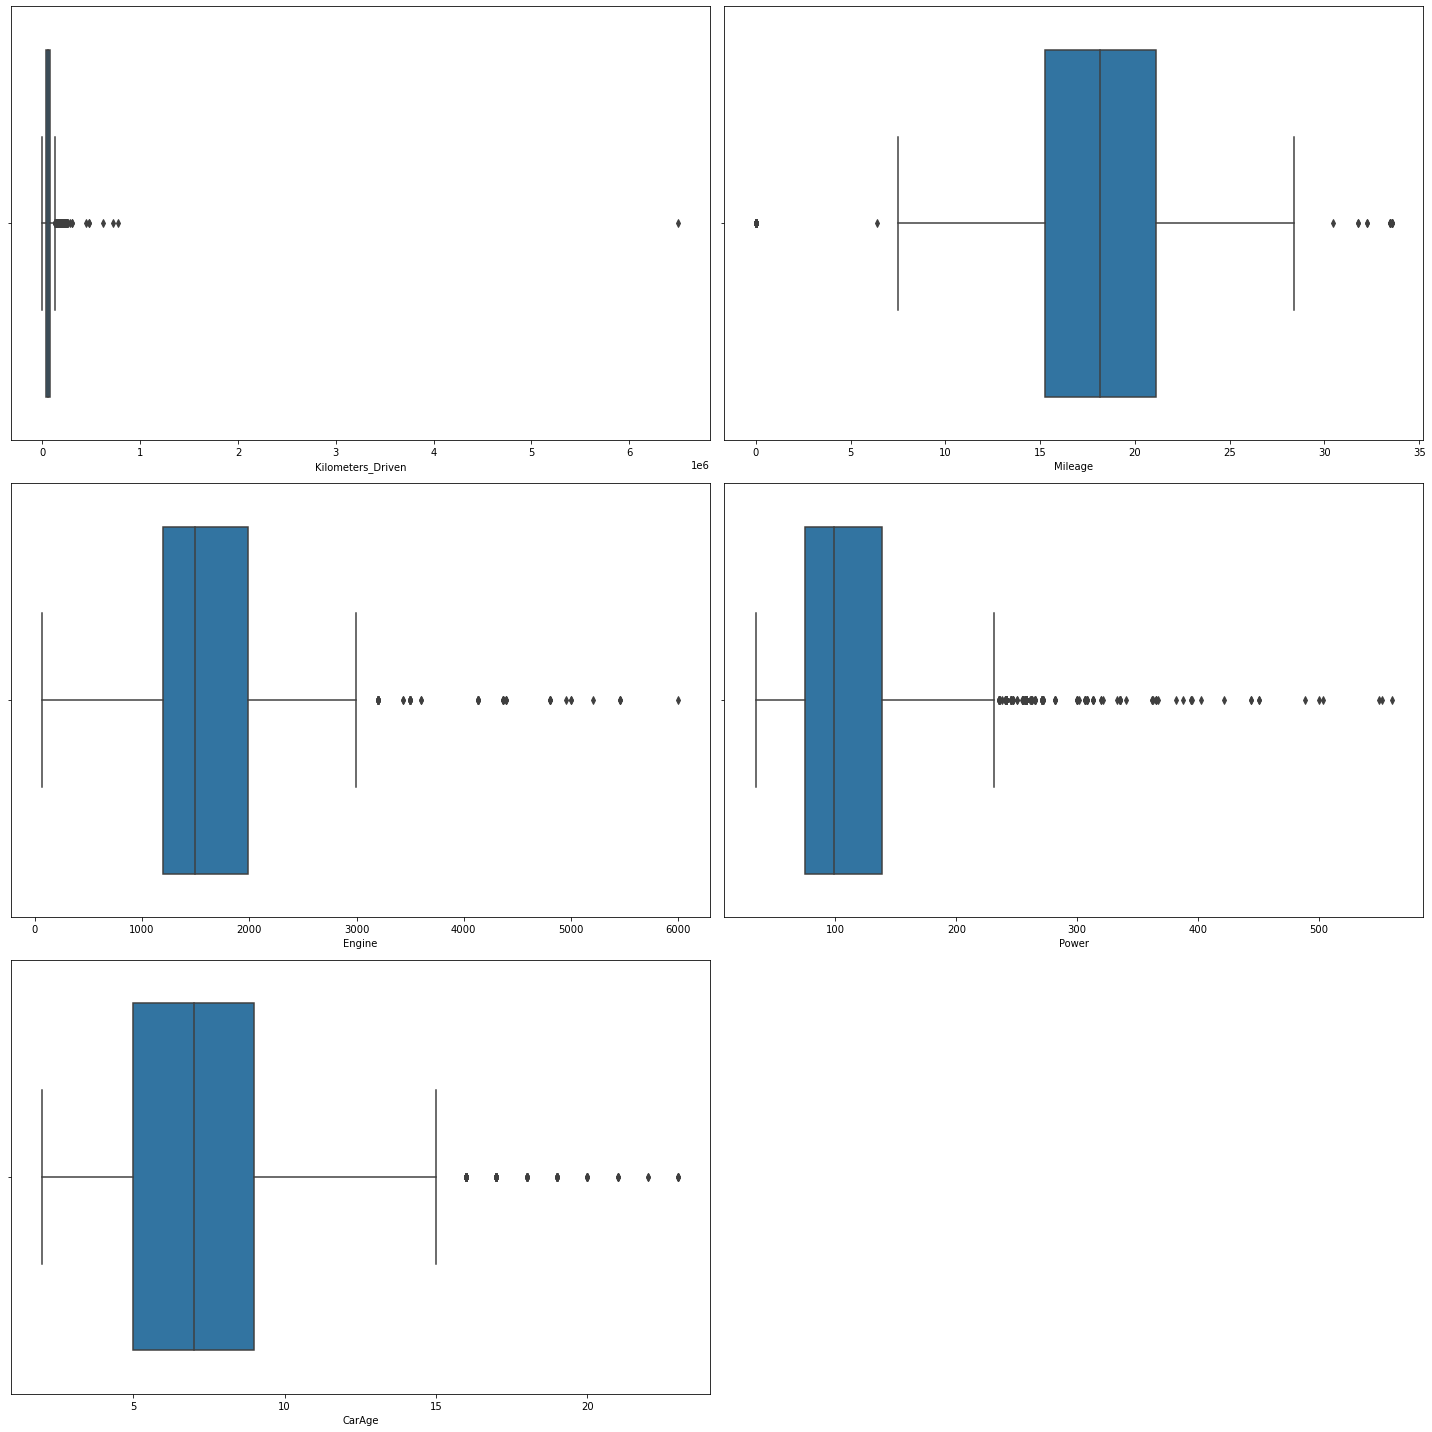

In [37]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',cars.shape)

In [40]:
cars[cars['Mileage'] > 30]['Fuel_Type'].value_counts()

CNG    14
Name: Fuel_Type, dtype: int64

<AxesSubplot:xlabel='Kilometers_Driven'>

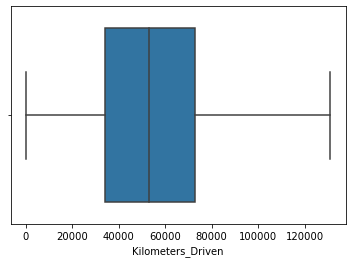

In [38]:
sns.boxplot(cars['Kilometers_Driven'], showfliers=False)

<AxesSubplot:xlabel='Price', ylabel='Density'>

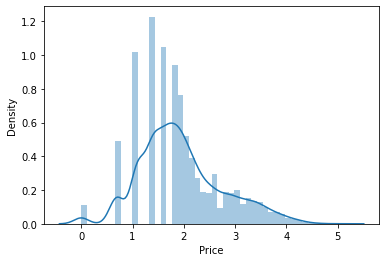

In [45]:
import numpy as np
sns.distplot(np.log1p(cars['Price']))

In [ ]:
np.exp

**Seems like Kilometers_Driven, Power, Engine have many outliers**

**Outliers Treatment**

In [ ]:
Q1 = cars.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = cars.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [ ]:
lower_range

In [ ]:
upper_range

In [ ]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 131551.75000,131551.75000,cars['Kilometers_Driven'])

cars['Mileage']=np.where(cars['Mileage']> 29.86,29.86,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']< 6.5,6.5,cars['Mileage'])

cars['Engine']=np.where(cars['Engine']< 19.00,19.00,cars['Engine'])
cars['Engine']=np.where(cars['Engine']> 3163.00,3163.00,cars['Engine'])

cars['Power']=np.where(cars['Power']> 232.75,232.75,cars['Power'])

cars['CarAge']=np.where(cars['CarAge']> 15.25,15.25,cars['CarAge'])

In [46]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 100000, 100000,cars['Kilometers_Driven'])

In [ ]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',cars.shape)

<AxesSubplot:xlabel='Kilometers_Driven'>

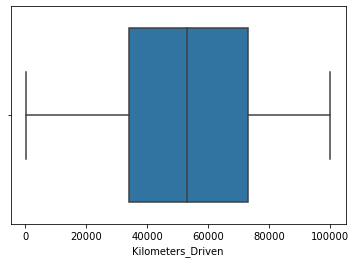

In [47]:
sns.boxplot(cars['Kilometers_Driven'])

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

**Null Values Imputation**

In [48]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [49]:
cols

Index(['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors',
       'Cars_Category', 'CarAge'],
      dtype='object')

In [50]:
objects=cars[cols].select_dtypes(include=['object','category']).columns
non_objects=cars[cols].select_dtypes(exclude=['object','category']).columns

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

**Impute the Non-Object values using Median**

In [51]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(cars[non_objects].iloc[:,:])

In [52]:
cars[non_objects]=imputer.transform(cars[non_objects])

**Impute the Object values using Mode**

In [53]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(cars[objects].iloc[:,:])

In [54]:
cars[objects]=imputer.transform(cars[objects])

In [55]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
Brand                0
Model                0
Cars_Category        0
CarAge               0
dtype: int64

**There are no Null values now**

**Correlation Plot**

<AxesSubplot:>

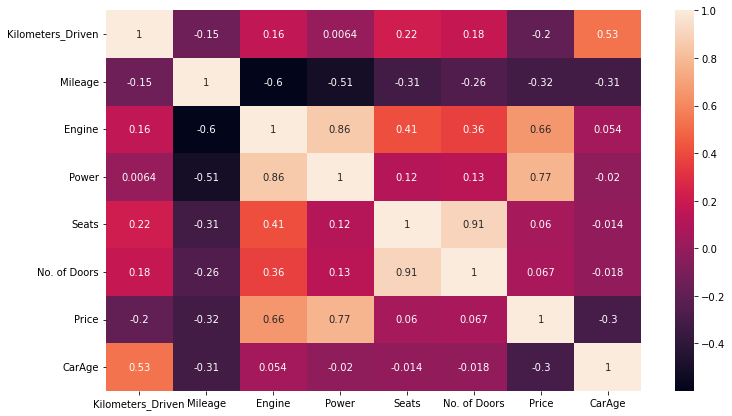

In [56]:
X=cars.drop(['Name','Year'],axis=1)

plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)

- Engine & Power, Seats & No.of Doors -> highly correlated
- For algorithms that are affected by correlation in independent variables, drop one of the variables in that set (Say: Engine and No. of Doors)

**Encode the Data**

In [57]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,Diesel,Manual,First,White,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,Diesel,Manual,First,Others,Toyota,Innova,Medium_Range


There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [59]:
cars.drop(['Name', 'Brand', 'Model', 'Year'], axis=1, inplace=True)

In [60]:
for feature in cars.columns: 
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes

        cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

In [ ]:
cars.dtypes

In [61]:
cars.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Cars_Category,CarAge
0,10,99000.00000,1,1,3,12.05000,2179.00000,120.00000,0,8.00000,5.00000,6,0,9.00000
1,7,18678.00000,4,1,0,21.10000,998.00000,100.00000,1,5.00000,4.00000,8,0,3.00000
2,1,100000.00000,1,1,0,11.68000,2498.00000,112.00000,2,7.00000,5.00000,4,0,8.00000
3,4,45000.00000,1,1,0,24.00000,1120.00000,70.00000,2,5.00000,4.00000,3,0,7.00000
4,4,65000.00000,1,1,0,12.80000,2494.00000,102.00000,1,8.00000,5.00000,6,1,10.00000


**Split the Data**

In [62]:
x=cars.drop(['Price'],axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
y=cars.Price

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=123,test_size=0.30)

In [64]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [65]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression           5.84575    5.64994         0.72993     0.74878
Decision Tree Regressor     0.02190    5.01359         1.00000     0.80218
Random Forest Regressor     1.31486    4.07649         0.98634     0.86922
ANN Regressor               2.79073    4.20322         0.93845     0.86096


**Looks Like ANN, DT, and RF are over-fitting, Let's Grid Search to get the best parameters**

**You can also visualise the tree and see where to prune it and decide the max_depth and other parameters**


**Grid Search on Decision Tree**

In [131]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3, njob=-1)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 15}


Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 15. You are welcome to try other values as well.

**Using Grid Search for Random Forest**

In [ ]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [62]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [63]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [64]:
#best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}

**Using Grid Search for ANN**

In [65]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [66]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [67]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}


In [68]:
#best_params_annr={'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}

In [69]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [132]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        mape_train.append(mape(y_train, i.predict(x_train)))
        mape_test.append(mape(y_test, i.predict(x_test)))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train, i.predict(x_train_scaled)))
        mape_test.append(mape(y_test, i.predict(x_test_scaled)))
        
        
result = pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,
                    'Training MAPE':mape_train,'Test MAPE': mape_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor'])

In [71]:
result

,Train RMSE,Test RMSE,Training Score,Test Score,Training MAPE,Test MAPE
Linear Regression,6.05161,6.01239,0.71058,0.71551,72.71776,74.17866
Decision Tree Regressor,3.69115,4.98627,0.89232,0.80433,21.99300,27.34447
Random Forest Regressor,3.46362,4.28660,0.90519,0.85539,21.23458,26.06219
ANN Regressor,2.74940,4.14298,0.94026,0.86492,20.24291,27.39695


> **So what do you think which algo performed well here?**

ANN or Random Forest or Decision Tree or Linear Regression?

> **Which performance metric will you prefer here?**

RMSE or R Squared or MAPE?


**Now, Go on explore the dataset and do more feature engineering, EDA and find out the best way to get better R Squared and lower RMSE**

                                               Happy Learning